# Data examination

Get an overview over the data, using text output and plots

In [4]:
import os
import numpy as np
import pandas as pd

# Preserve plots in jupyter notebook
%matplotlib inline  

In [6]:
# Define path to the data
file_path = os.path.join(os.path.expanduser("~"), 
                         "earth-analytics", 
                         "data",
                         "colorado-flood",
                         "precipitation",
                         "805325-precip-daily-2003-2013.csv")

# Import the file as a pandas dataframe
boulder_precip_2003_2013 = pd.read_csv(file_path)

## Text based overview

In [8]:
# Show dataframe info: column names, types, ...
boulder_precip_2003_2013.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1840 entries, 0 to 1839
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   STATION           1840 non-null   object 
 1   STATION_NAME      1840 non-null   object 
 2   ELEVATION         1840 non-null   float64
 3   LATITUDE          1840 non-null   float64
 4   LONGITUDE         1840 non-null   float64
 5   DATE              1840 non-null   object 
 6   HPCP              1840 non-null   float64
 7   Measurement Flag  1840 non-null   object 
 8   Quality Flag      1840 non-null   object 
dtypes: float64(4), object(5)
memory usage: 129.5+ KB


In [9]:
# Show the first 4 rows of the data
boulder_precip_2003_2013.head()

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,DATE,HPCP,Measurement Flag,Quality Flag
0,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,20030101 01:00,0.0,g,
1,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,20030201 01:00,0.0,g,
2,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,20030202 19:00,0.2,,
3,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,20030202 22:00,0.1,,
4,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,20030203 02:00,0.1,,


In [13]:
# Get statistical info for all numeric columns. 
boulder_precip_2003_2013.describe()

,ELEVATION,LATITUDE,LONGITUDE,HPCP
count,1840.0,1840.000000,1840.000000,1840.000000
mean,1650.5,40.033851,-105.281106,51.192587
std,0.0,0.000045,0.000005,220.208147
min,1650.5,40.033800,-105.281110,0.000000
25%,1650.5,40.033800,-105.281110,0.100000
50%,1650.5,40.033890,-105.281110,0.100000
75%,1650.5,40.033890,-105.281100,0.100000
max,1650.5,40.033890,-105.281100,999.990000


In [17]:
# Describe for non-numeric columns
boulder_precip_2003_2013["Quality Flag"].describe()

count     1840
unique       3
top           
freq      1836
Name: Quality Flag, dtype: object

In [49]:
# Group data by one or several columns
boulder_precip_2003_2013.groupby(["Measurement Flag", "Quality Flag"])["HPCP"].describe()

count        mean           std     min  \
Measurement Flag Quality Flag                                             
                               1618.0    0.120334  9.103616e-02    0.10   
                 Z                2.0    0.100000  0.000000e+00    0.10   
                 q                2.0    0.200000  2.828427e-01    0.00   
[                                11.0  999.990000  1.192358e-13  999.99   
]                                11.0  999.990000  1.192358e-13  999.99   
g                               124.0    0.000000  0.000000e+00    0.00   
{                                36.0  999.990000  2.305990e-13  999.99   
}                                36.0  999.990000  2.305990e-13  999.99   

                                  25%     50%     75%     max  
Measurement Flag Quality Flag                                  
                                 0.10    0.10    0.10    2.20  
                 Z               0.10    0.10    0.10    0.10  
                 q               0.10    0.20    0.30    0.40  
[                              999.99  999.99  999.99  999.99  
]                              999.99  999.99  999.99  999.99  
g                                0.00    0.00    0.00    0.00  
{                              999.99  999.99  999.99  999.99  
}                              999.99  999.99  999.99  999.99

## Plot based overview
... for the numeric columns

<AxesSubplot:>

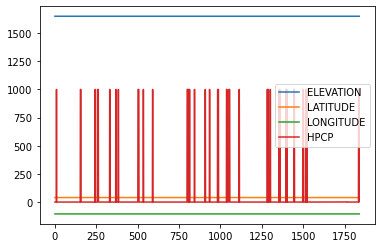

In [15]:
# Plot all numeric columns at once
# x axis: row number
# y axis: data values, one color per column
boulder_precip_2003_2013.plot()

<AxesSubplot:>

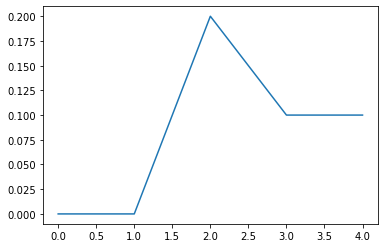

In [22]:
# Plot values per row for one column - here for a subset of rows
# x axis: row number
# y axis: data values
boulder_precip_2003_2013["HPCP"].head().plot()

<AxesSubplot:ylabel='Frequency'>

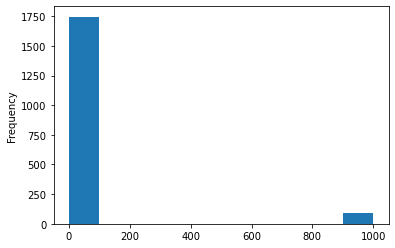

In [46]:
# Plot histogram for one column 
boulder_precip_2003_2013["HPCP"].plot(kind='hist')

array([[<AxesSubplot:title={'center':'HPCP'}>]], dtype=object)

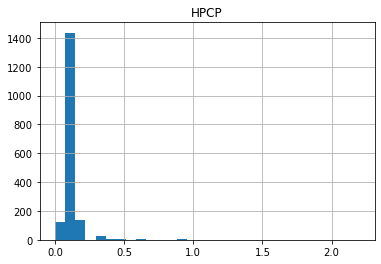

In [63]:
# Filter data
precip_filtered = boulder_precip_2003_2013[boulder_precip_2003_2013["HPCP"] < 10]

# Plot histogram for one column (take 2)
precip_filtered.hist(column='HPCP', bins=30)

array([[<AxesSubplot:title={'center':'HPCP'}>]], dtype=object)

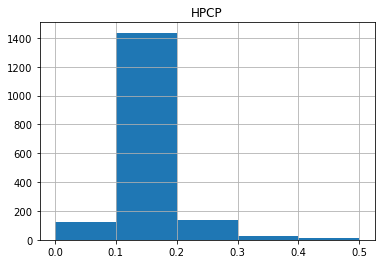

In [68]:
# Plot histogram, custom binning, 
precip_filtered.hist(column='HPCP', bins=[.0, .1, .2, .3, .4, .5])

array([[<AxesSubplot:title={'center':' '}>,
        <AxesSubplot:title={'center':'Z'}>],
       [<AxesSubplot:title={'center':'q'}>, <AxesSubplot:>]], dtype=object)

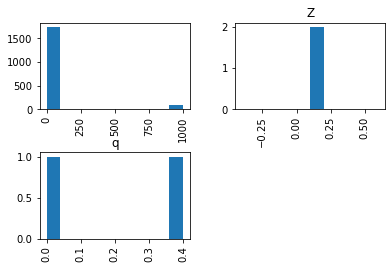

In [77]:
# Plot histogram separated by values of another column 
boulder_precip_2003_2013.hist(column='HPCP', by='Quality Flag')